# Tutorial

At the end of this step, you will understand the concepts of underfitting and overfitting, and you will be able to apply these ideas to make your models more accurate.

## Experimenting With Different Models

Now that you have a reliable way to measure model accuracy, you can experiment with alternative models and see which gives the best predictions. But what alternatives do you have for models?

You can see in scikit-learn's documentation that the decision tree model has many options (more than you'll want or need for a long time). The most important options determine the tree's depth. Recall from the first lesson in this course that a tree's depth is a measure of how many splits it makes before coming to a prediction. This is a relatively shallow tree

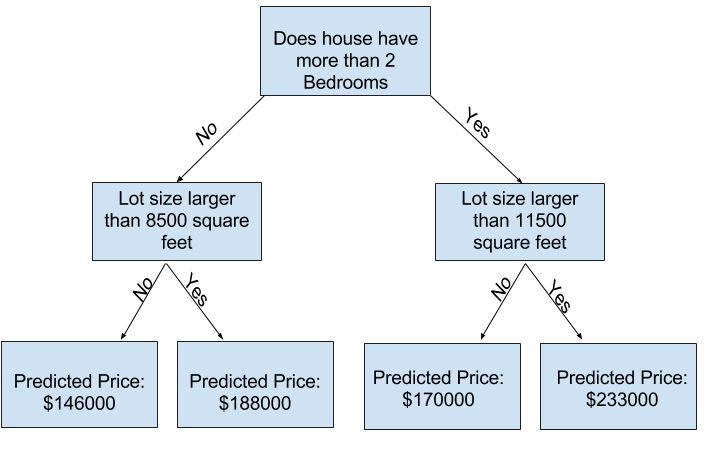



In practice, it's not uncommon for a tree to have 10 splits between the top level (all houses) and a leaf. As the tree gets deeper, the dataset gets sliced up into leaves with fewer houses. If a tree only had 1 split, it divides the data into 2 groups. If each group is split again, we would get 4 groups of houses. Splitting each of those again would create 8 groups. If we keep doubling the number of groups by adding more splits at each level, we'll have  210  groups of houses by the time we get to the 10th level. That's 1024 leaves.

When we divide the houses amongst many leaves, we also have fewer houses in each leaf. `Leaves with very few houses will make predictions that are quite close to those homes' actual values, but they may make very unreliable predictions for new data (because each prediction is based on only a few houses)`.

This is a phenomenon called **overfitting**, where a model matches the training data almost perfectly, but does poorly in validation and other new data. On the flip side, if we make our tree very shallow, it doesn't divide up the houses into very distinct groups.

At an extreme, if a tree divides houses into only 2 or 4, each group still has a wide variety of houses. Resulting predictions may be far off for most houses, even in the training data (and it will be bad in validation too for the same reason). `When a model fails to capture important distinctions and patterns in the data, so it performs poorly even in training data`, that is called **underfitting**.

Since we care about accuracy on new data, which we estimate from our validation data, we want to find the sweet spot between underfitting and overfitting. Visually, we want the low point of the (red) validation curve in the figure below.

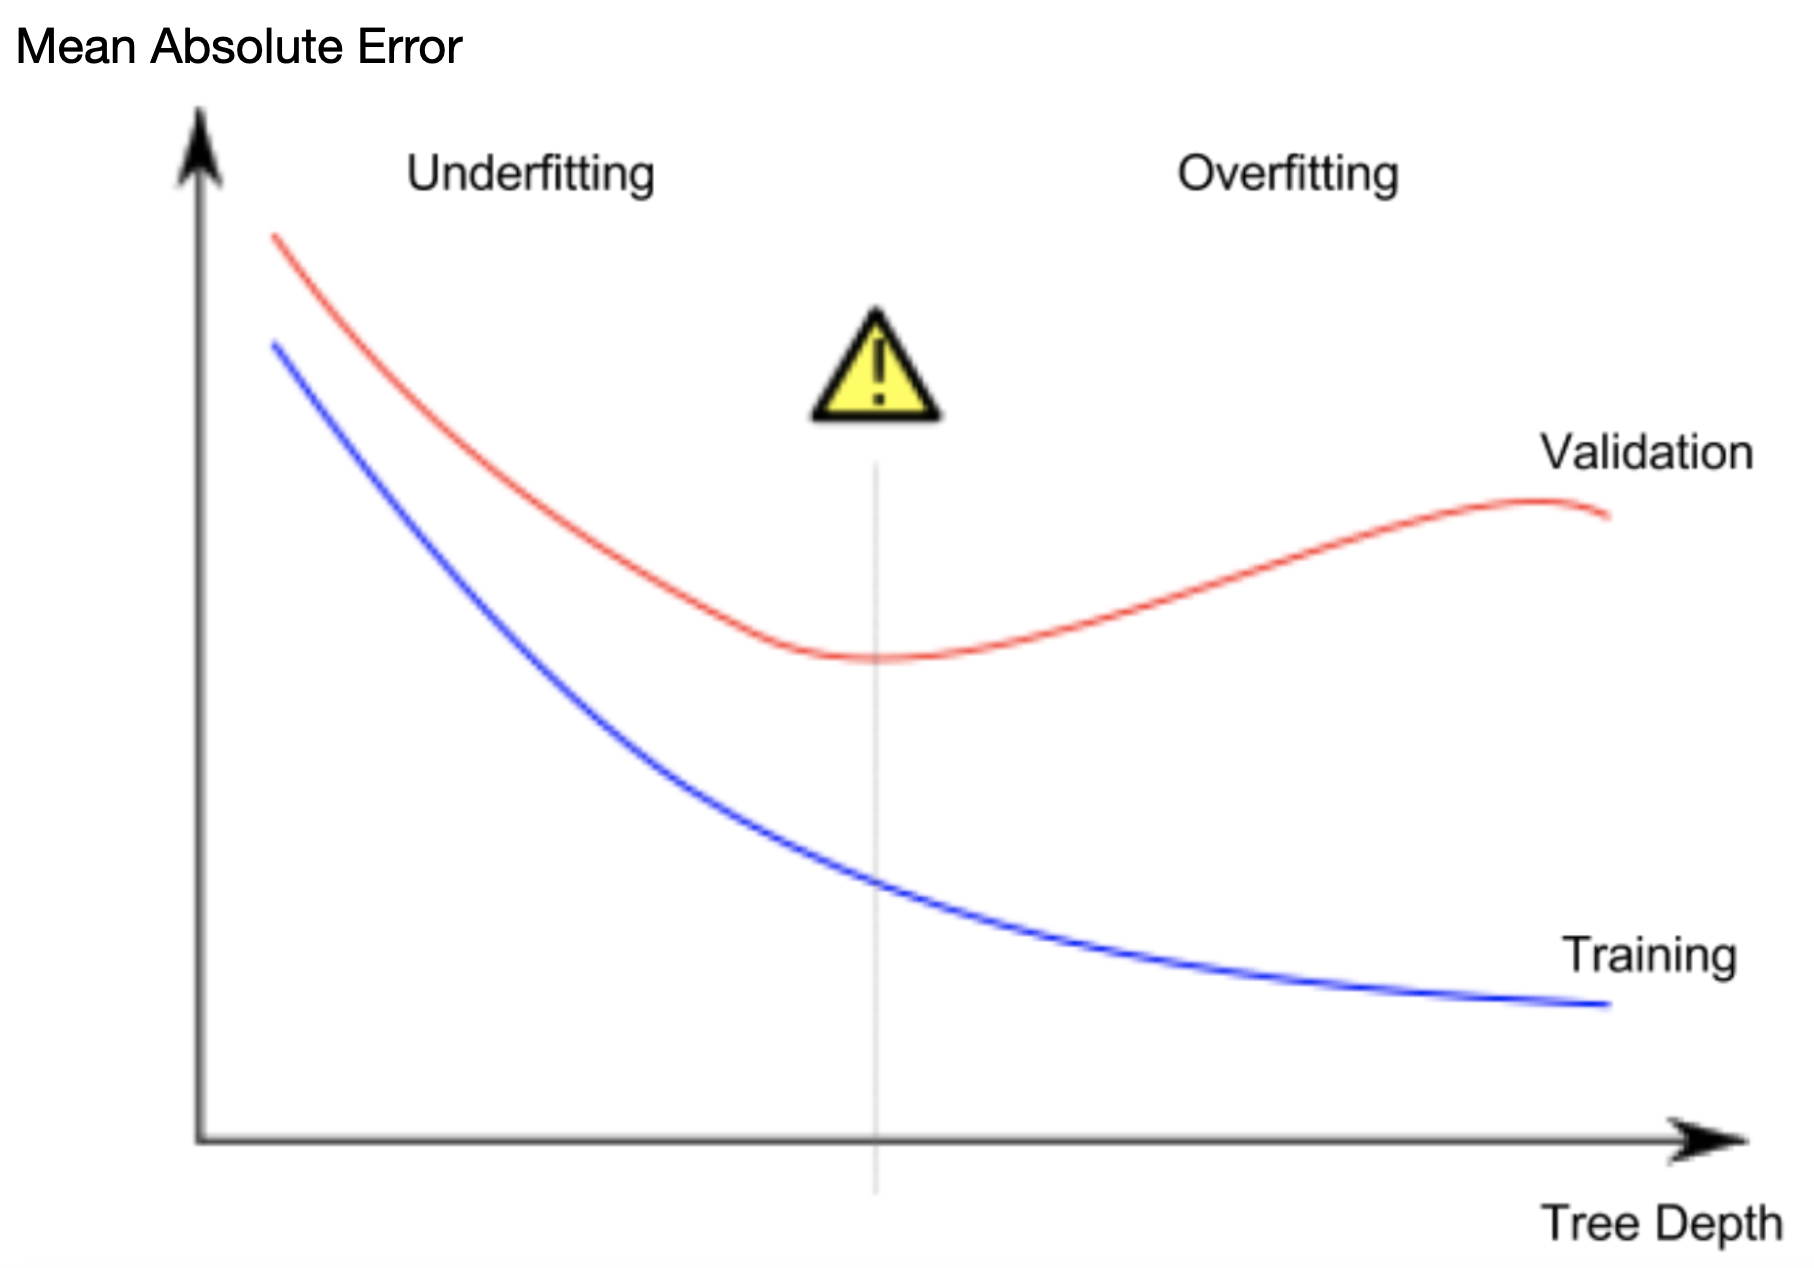

## Example
There are a few alternatives for controlling the tree depth, and many allow for some routes through the tree to have greater depth than other routes. But the max_leaf_nodes argument provides a very sensible way to control overfitting vs underfitting. The more leaves we allow the model to make, the more we move from the underfitting area in the above graph to the overfitting area.

We can use a utility function to help compare MAE scores from different values for *max_leaf_nodes*:

In [1]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

The data is loaded into **train_X, val_X, train_y** and **val_y** using the code you've already seen (and which you've already written).

In [2]:
# Data Loading Code Runs At This Point
import pandas as pd
    
# Load data
#melbourne_file_path = '../input/melbourne-housing-snapshot/melb_data.csv'
melbourne_data = pd.read_csv('2.Basic Data Exploration/melb_data.csv') 
# Filter rows with missing values
filtered_melbourne_data = melbourne_data.dropna(axis=0)
# Choose target and features
y = filtered_melbourne_data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
                        'YearBuilt', 'Lattitude', 'Longtitude']
X = filtered_melbourne_data[melbourne_features]

from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

We can use a for-loop to compare the accuracy of models built with different values for *max_leaf_nodes*.

In [3]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y) 
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae)) 
# In Python,  `\` is used for a special character (also called as an escape character).  
#`\t` is used to add a tab space while printing an output.
#  %d is for decimal integer
# %s is for generic string or object and in case of object, it will be converted to string


Max leaf nodes: 5  		 Mean Absolute Error:  347380
Max leaf nodes: 50  		 Mean Absolute Error:  258171
Max leaf nodes: 500  		 Mean Absolute Error:  243495
Max leaf nodes: 5000  		 Mean Absolute Error:  254983


Of the options listed, 500 is the optimal number of leaves.

## Conclusion

Here's the takeaway: Models can suffer from either:

* **Overfitting:** capturing spurious patterns that won't recur in the future, leading to less accurate predictions, or
* **Underfitting:** failing to capture relevant patterns, again leading to less accurate predictions.

We use **validation** data, which isn't used in model training, to measure a candidate model's accuracy. This lets us try many candidate models and keep the best one.

## Recap
You've built your first model, and now it's time to optimize the size of the tree to make better predictions. Run this cell to set up your coding environment where the previous step left off.

In [4]:
# Code you have previously used to load data
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


# Path of the file to read
home_data = pd.read_csv('3. Your First Machine Learning Model/train.csv') 

# Create target object and call it y
y = home_data.SalePrice
# Create X
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = home_data[features]

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Specify Model
iowa_model = DecisionTreeRegressor(random_state=1)
# Fit Model
iowa_model.fit(train_X, train_y)

# Make validation predictions and calculate mean absolute error
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE: {:,.0f}".format(val_mae))

Validation MAE: 29,653


# Exercises
You could write the function `get_mae` yourself. For now, we'll supply it. This is the same function you read about in the previous lesson. Just run the cell below.

In [5]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

## Step 1: Compare Different Tree Sizes
Write a loop that tries the following values for *max_leaf_nodes* from a set of possible values.

Call the *get_mae* function on each value of max_leaf_nodes. Store the output in some way that allows you to select the value of `max_leaf_nodes` that gives the most accurate model on your data.

In [6]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
# Write loop to find the ideal tree size from candidate_max_leaf_nodes
dict={}
for max_leaf_nodes in candidate_max_leaf_nodes:
    my_mae = get_mae(max_leaf_nodes,train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))
    dict[max_leaf_nodes] =  my_mae 

print(dict)
Best = min(dict, key=dict.get) # min function on value of dict  & d = {key1 : value1, key2 : value2 , ...}
print('The best tree size is {}'.format(Best))

Max leaf nodes: 5  		 Mean Absolute Error:  35044
Max leaf nodes: 25  		 Mean Absolute Error:  29016
Max leaf nodes: 50  		 Mean Absolute Error:  27405
Max leaf nodes: 100  		 Mean Absolute Error:  27282
Max leaf nodes: 250  		 Mean Absolute Error:  27893
Max leaf nodes: 500  		 Mean Absolute Error:  29454
{5: 35044.51299744237, 25: 29016.41319191076, 50: 27405.930473214907, 100: 27282.50803885739, 250: 27893.822225701646, 500: 29454.18598068598}
The best tree size is 100


## Step 2: Fit Model Using All Data
You know the best tree size. If you were going to deploy this model in practice, you would make it even more accurate by using all of the data and keeping that tree size.  That is, you don't need to hold out the validation data now that you've made all your modeling decisions.

In [7]:
# Fill in argument to make optimal size and uncomment
final_model = DecisionTreeRegressor(max_leaf_nodes=100,random_state=0)

# fit the final model and uncomment the next two lines
final_model.fit(X, y)


DecisionTreeRegressor(max_leaf_nodes=100, random_state=0)